In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_load = "data/city_data.csv"
ride_load = "data/ride_data.csv"

# Read the City and Ride Data
City_Data = pd.read_csv(city_load)
Ride_Data = pd.read_csv(ride_load)

# Combine the data into a single dataset
PYBER_df = pd.merge(Ride_Data, City_Data, on="city", how="left")

# Display the data table for preview
PYBER_df.head()


city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Bubble Plot of Ride Sharing Data

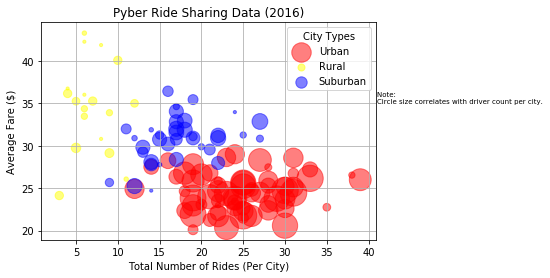

In [27]:
## Obtain the x and y coordinates for each of the three city types
RURAL_t = PYBER_df[PYBER_df["type"] == "Rural"].groupby([PYBER_df["city"]])
rural_X = RURAL_t["ride_id"].count()
rural_Y = RURAL_t["fare"].mean()
rural_Z = RURAL_t["driver_count"].mean()

URBAN_t = PYBER_df[PYBER_df["type"] == "Urban"].groupby([PYBER_df["city"]])
urban_X = URBAN_t["ride_id"].count()
urban_Y = URBAN_t["fare"].mean()
urban_Z = URBAN_t["driver_count"].mean()

SUBURBAN_t = PYBER_df[PYBER_df["type"] == "Suburban"].groupby([PYBER_df["city"]])
suburban_X = SUBURBAN_t["ride_id"].count()
suburban_Y = SUBURBAN_t["fare"].mean()
suburban_Z = SUBURBAN_t["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_X, urban_Y, label = "Urban", s=urban_Z * 10, color=["red"], alpha = .5, marker="o")
plt.scatter(rural_X, rural_Y, label = "Rural", s=rural_Z * 10, color=["yellow"], alpha = .5, marker="o")
plt.scatter(suburban_X, suburban_Y, label = "Suburban", s=suburban_Z  * 10, color=["blue"], alpha = 0.5, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
LEGEND = plt.legend(fontsize = 10, title= "City Types") 

# Incorporate a text label regarding circle size
plt.text(41,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 7)

# Save Figure
plt.savefig("data/PyberRideSharingData.png")


## Total Fares by City Type

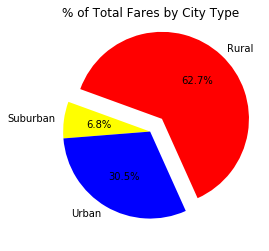

In [28]:
# Calculate Type Percents
GROUP_SHOT = PYBER_df.groupby(['type'])
SUM_SHOT = GROUP_SHOT['fare'].sum()

# Build Pie Chart
labels = ["Suburban","Urban", "Rural"]
explode = (0, 0, 0.2)
colors = ["yellow", "blue", "red"]
plt.pie(SUM_SHOT, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=160)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("data/PyberTotalFaresbyCityType.png")

## Total Rides by City Type

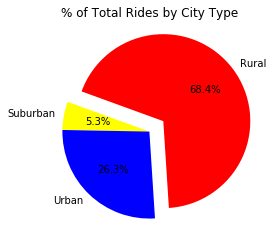

In [29]:
# Calculate Ride Percents
RIDE_C = GROUP_SHOT['ride_id'].count()

# Build Pie Chart
labels = ["Suburban","Urban", "Rural"]
explode = (0, 0, 0.2)
colors = ["yellow", "blue", "red"]
plt.pie(RIDE_C, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=160)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/PyberTotalRidesbyCityType.png")

## Total Drivers by City Type

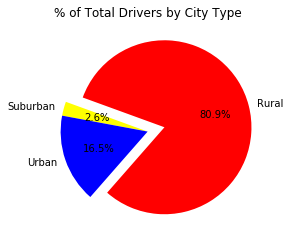

In [33]:
# Calculate Driver Percents
GROUP_D = City_Data.groupby(['type'])
SUM_D = GROUP_D['driver_count'].sum()

# Build Pie Charts
labels = ["Suburban","Urban", "Rural"]
explode = (0, 0, 0.2)
colors = ["yellow", "blue", "red"]
plt.pie(SUM_D, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("data/PyberTotalDriversbyCityType.png")